In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# A violência no Rio de Janeiro está aumentando?

Vamos tentar responder essa pergunta usando números, dados. Vamos usar a "Base DP: evolução mensal das estatísticas por circunscrição de Delegacia (1/2003 a 12/2017)", disponível em http://www.ispdados.rj.gov.br/estatistica.html

Obs.: se você não sabe programar ignore os blocos cinza com código

Abaixo você pode ver uma tabela com todos os indicadores de violência da capital Rio de Janeiro

In [263]:
df = pd.read_csv('data/BaseDPEvolucaoMensalCisp.csv', delimiter=";", encoding = "ISO-8859-1")
df = df[df["munic"] == "Rio de Janeiro"]

violence_indicators = ["hom_doloso","lesao_corp_morte","latrocinio","hom_por_interv_policial","tentat_hom","lesao_corp_dolosa","estupro","hom_culposo","lesao_corp_culposa","roubo_comercio","roubo_residencia","roubo_veiculo","roubo_carga","roubo_transeunte","roubo_em_coletivo","roubo_banco","roubo_cx_eletronico","roubo_celular","roubo_conducao_saque","roubo_bicicleta","outros_roubos","furto_veiculos","furto_bicicleta","outros_furtos","sequestro","extorsao","sequestro_relampago","estelionato","apreensao_drogas","recuperacao_veiculos","apreensoes","gaai","aaapai_cmba","ameaca","pessoas_desaparecidas","encontro_cadaver","encontro_ossada","pol_militares_mortos_serv","pol_civis_mortos_serv"]
df = df[["mes","vano"] + violence_indicators]
df = df.fillna(0)
df = df.groupby(["vano", "mes"], as_index=False).sum()
df['total'] = df[violence_indicators].sum(axis=1)

df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,total
0,2003,1,208,4,11,60,163,2429,85,48,...,0.0,0.0,0.0,2072,167,84,2,3,2,21582.0
1,2003,2,219,2,4,65,144,2573,84,54,...,0.0,0.0,0.0,2027,174,112,1,2,0,22089.0
2,2003,3,259,1,8,82,120,2470,81,60,...,0.0,0.0,0.0,2012,188,91,6,3,1,21465.0
3,2003,4,245,3,9,84,133,2205,68,67,...,0.0,0.0,0.0,1921,155,60,1,4,0,21003.0
4,2003,5,237,3,13,67,170,2025,83,76,...,0.0,0.0,0.0,1906,179,90,2,3,1,21857.0
5,2003,6,199,0,6,66,129,2265,69,75,...,0.0,0.0,0.0,1979,178,77,2,3,1,20093.0
6,2003,7,192,2,12,57,180,2365,67,63,...,0.0,0.0,0.0,2000,137,65,1,1,1,20508.0
7,2003,8,200,4,5,69,211,2105,58,57,...,0.0,0.0,0.0,1917,156,95,2,4,0,19943.0
8,2003,9,184,2,5,66,112,2240,67,65,...,0.0,0.0,0.0,2105,210,66,0,2,0,20925.0
9,2003,10,188,0,8,78,169,2235,84,59,...,0.0,0.0,0.0,1936,165,47,5,3,0,21264.0


**Agora vamos colocar esses indicadores num gráfico**

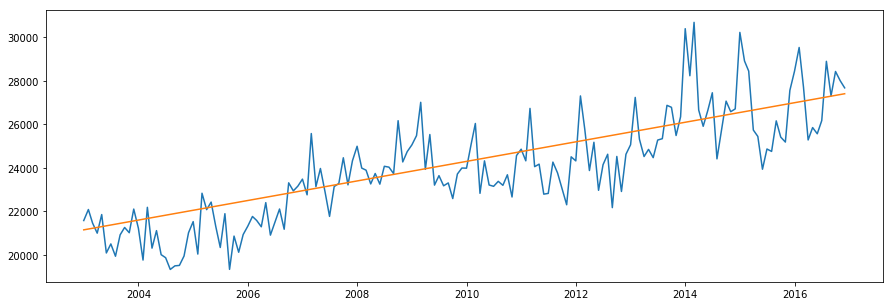

In [277]:
df['ano_mes'] = [ datetime.date(year, month, 1) for (year, month) in zip(df['vano'],df['mes']) ]
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df['ano_mes'], df['total'], label='linear')

def plot_avg(column):
    avg_2003 = df[df['vano'] == 2003][column].mean()
    avg_2016 = df[df['vano'] == 2016][column].mean()
    last = len(df) - 1
    plt.plot([df['ano_mes'][0], df['ano_mes'][last]], [avg_2003, avg_2016], label='linear')

plot_avg('total')
    
plt.show()

Parece que a violência está aumentando não é mesmo? Mas espera um momento, a população do Rio também cresce a cada ano, o que aconte se levarmos o crescimento da população em conta também?

Para o crescimento da população temos apenas dados do censo de 2000, censo de 2010 e uma estimativa para 2017 (fonte: https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Evolu%C3%A7%C3%A3o_demogr%C3%A1fica_da_cidade_do_Rio_de_Janeiro), vamos derivar o restante dos anos a partir desses pontos

In [282]:
pop = []

pop_2000 = 5851914
pop_2010 = 6320446
pop_2017 = 6520266
avg_grow_2000_2010 = (pop_2010 - pop_2000) / 10
avg_grow_2010_2017 = (pop_2017 - pop_2010) / 7

for i in range(0, 10):
    pop.append(round(pop_2000 + avg_grow_2000_2010 * i))
for i in range(0, 8):
    pop.append(round(pop_2010 + avg_grow_2010_2017 * i))

population = pd.DataFrame({'population': pop}, index=range(2000, 2018))
population

,population
2000,5851914
2001,5898767
2002,5945620
2003,5992474
2004,6039327
2005,6086180
2006,6133033
2007,6179886
2008,6226740
2009,6273593


**Vamos ver então como ficam os indíces de violência a cada 100 mil habitantes**

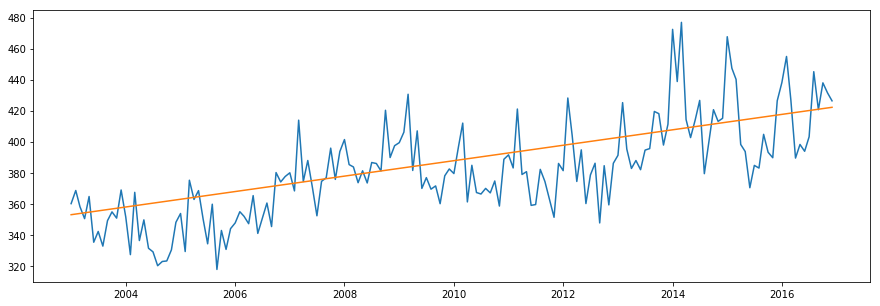

In [278]:
df['total/100k'] = [ total / (population['population'][year] / 100000) for (year, total) in zip(df['vano'], df['total']) ]

plt.plot(df['ano_mes'], df['total/100k'], label='linear')
plot_avg('total/100k')

plt.show()

**É, parece que sim, a violencia está aumentando mesmo levando em conta o crescimento populacional :(**

Uma curiosidade: se plotamos todos os indicadores, o indicador *roubo_transeunte* foi de longe o que mais cresceu nos últimos anos

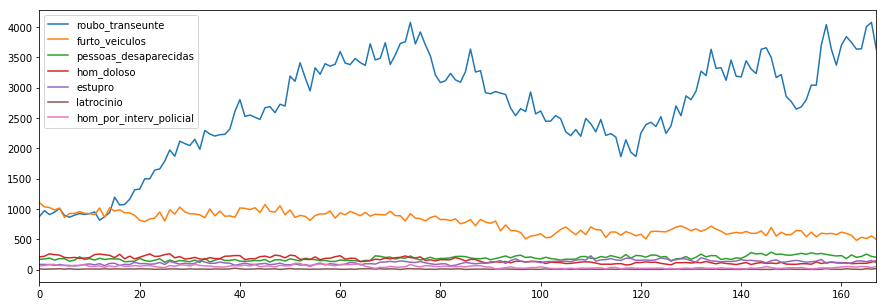

In [289]:
# alguns exemplos apenas porque plotar tudo deixaria o gráfico muito poluído
columns_to_plot = ['roubo_transeunte',
                   'furto_veiculos',
                   'pessoas_desaparecidas',
                   'hom_doloso',
                   'estupro',
                   'latrocinio',
                   'hom_por_interv_policial',
                  ]

df[columns_to_plot].plot()

plt.show()

Se removermos o indicador *roubo_transeunte* do gráfico, percebemos que o restante dos indicadores de violência aumentaram bem pouco.

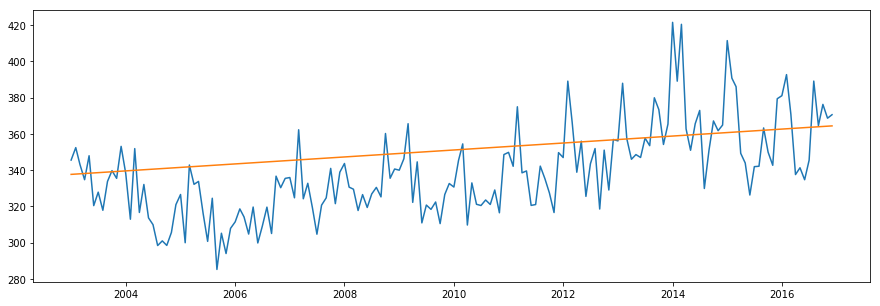

In [279]:
violence_indicators2 = ["hom_doloso","lesao_corp_morte","latrocinio","hom_por_interv_policial","tentat_hom","lesao_corp_dolosa","estupro","hom_culposo","lesao_corp_culposa","roubo_comercio","roubo_residencia","roubo_veiculo","roubo_carga","roubo_em_coletivo","roubo_banco","roubo_cx_eletronico","roubo_celular","roubo_conducao_saque","roubo_bicicleta","outros_roubos","furto_veiculos","furto_bicicleta","outros_furtos","sequestro","extorsao","sequestro_relampago","estelionato","apreensao_drogas","recuperacao_veiculos","apreensoes","gaai","aaapai_cmba","ameaca","pessoas_desaparecidas","encontro_cadaver","encontro_ossada","pol_militares_mortos_serv","pol_civis_mortos_serv"]
df['total sem roubo_transeunte'] = df[violence_indicators2].sum(axis=1)
df['totalsrt/100k'] = [ total / (population['population'][year] / 100000) for (year, total) in zip(df['vano'], df['total sem roubo_transeunte']) ]

plt.plot(df['ano_mes'], df['totalsrt/100k'], label='linear')
plot_avg('totalsrt/100k')

plt.show()

## Conclusão

A violência no Rio está aumentando, parece que ali entre os anos 2010-2013 tinha começado a cair mas logo voltou a subir, não sei o que estávamos fazendo de certo mas logo começamos a errar de novo.

O roubo a transeuntes foi o que mais aumentou absurdamente, os outros tipos de violência nem tanto, talvez porque com a vinda dos celulares que começaram a ser muito roubados? Talvez mais pessoas fazem BO agora mesmo pra furtos simples porque é mais fácil pelo site da polícia? Não sei, são chutes.

De qualquer forma analisar esses dados foi uma experiência interessante, se eu fiz alguma matemática errada, violei alguma regra ao plotar os gráficos ou coisa do tipo, por favor, me avise no twitter [@_rchaves_](https://twitter.com/_rchaves_), ainda estou aprendendo.

Feedbacks são bem vindos :)